<a href="https://colab.research.google.com/github/OsheenArya/SpeechEmotionRecognitionCapstone/blob/main/DS440_EmotionClassification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/gdrive')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import librosa
import soundfile
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns
import os, glob, pickle
import librosa
import librosa.display
import numpy as np
import pandas as pd

In [ ]:
paths = pd.read_csv('/gdrive/MyDrive/speech_data_paths.csv')

happy      1923
fear       1923
sad        1923
disgust    1923
angry      1923
neutral    1703
suprise     652
calm        192
Name: emotion, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


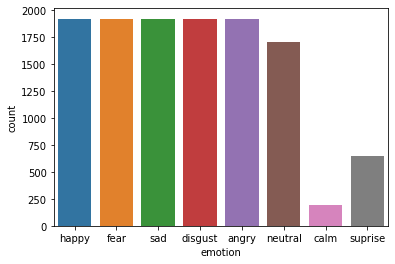

In [ ]:
# checking balance of data

print(paths['emotion'].value_counts())
print(sns.countplot(paths['emotion']))

happy      1923
fear       1923
sad        1923
disgust    1923
angry      1923
neutral    1703
Name: emotion, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


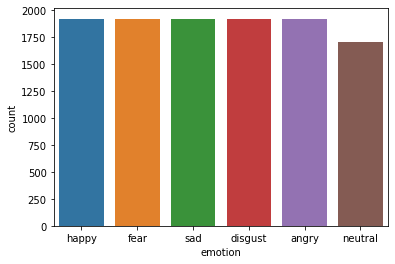

In [ ]:
# As the data is not balanced, for the purpose of this project we will be dropping suprise and calm and will be creating a ML algorithm to classify the remaining six emotions.

paths = paths[(paths.emotion != 'calm') & (paths.emotion != 'suprise')]
print(paths['emotion'].value_counts())
print(sns.countplot(paths['emotion']))

In [ ]:
happy_path = "/gdrive/MyDrive/speech_datasets/Ravdess/audio_speech_actors_01-24/Actor_23/03-01-03-02-02-01-23.wav"
fear_path = "/gdrive/MyDrive/speech_datasets/Ravdess/audio_speech_actors_01-24/Actor_23/03-01-06-02-02-01-23.wav"
sad_path = "/gdrive/MyDrive/speech_datasets/Ravdess/audio_speech_actors_01-24/Actor_23/03-01-04-02-01-01-23.wav"
disgust_path = "/gdrive/MyDrive/speech_datasets/Ravdess/audio_speech_actors_01-24/Actor_23/03-01-07-01-02-02-23.wav"
angry_path = "/gdrive/MyDrive/speech_datasets/Ravdess/audio_speech_actors_01-24/Actor_23/03-01-05-01-01-02-23.wav"
neutral_path = "/gdrive/MyDrive/speech_datasets/Ravdess/audio_speech_actors_01-24/Actor_23/03-01-01-01-02-02-23.wav" 

In [ ]:
def audio_plots(path_name,emotion):
  # waveplot
  data, sample_rate = librosa.load(path_name)
  plt.figure(figsize = (10,4))
  plt.title(emotion, size = 20)
  librosa.display.waveplot(data, sr = sample_rate)
  plt.show()
  
  # spectogram 
  X = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize = (10,4))
  plt.title(emotion, size = 20)
  librosa.display.specshow(xdb, sr= sample_rate, x_axis= 'time', y_axis= 'hz')
  plt.colorbar()

def play_audio(path_name,emotion):
  print('Audio Sample of:',emotion)
  display(ipd.Audio(path_name))

# Look at the audio samples and the correspondeing waveplot and spectogram of diffrent emotions

Audio Sample of: happy


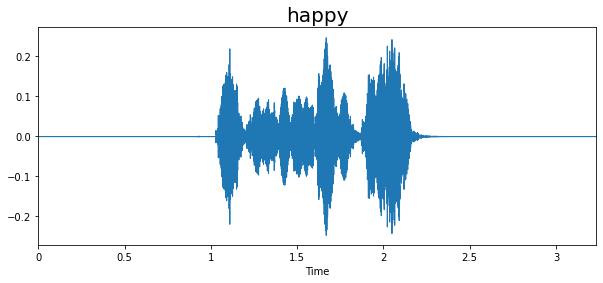

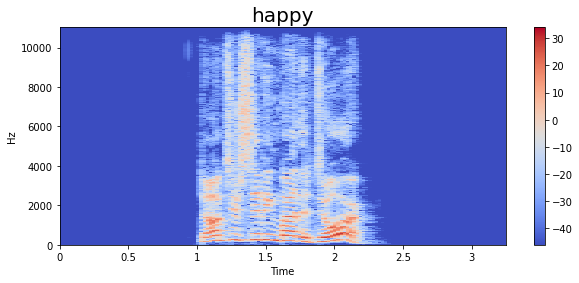

In [ ]:
play_audio(happy_path, 'happy')
audio_plots(happy_path, 'happy')

Audio Sample of: fear


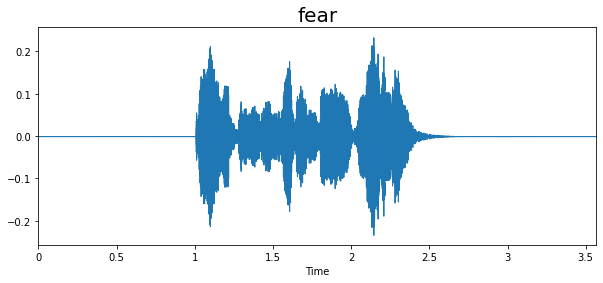

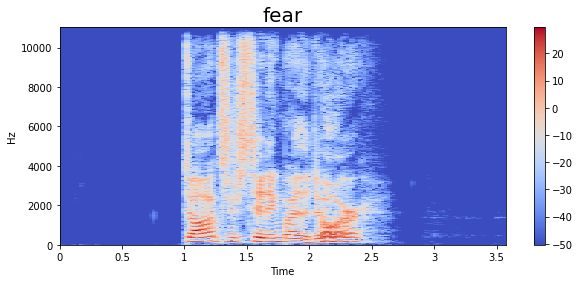

In [ ]:
play_audio(fear_path,'fear')
audio_plots(fear_path,'fear')

Audio Sample of: sad


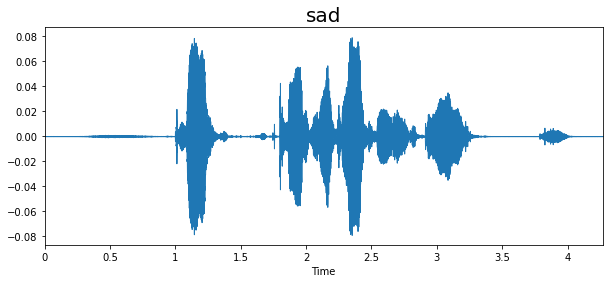

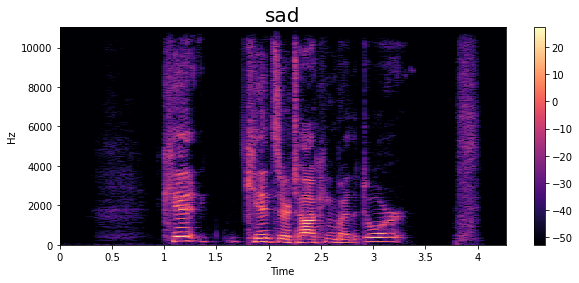

In [ ]:
play_audio(sad_path,'sad')
audio_plots(sad_path,'sad')

Audio Sample of: disgust


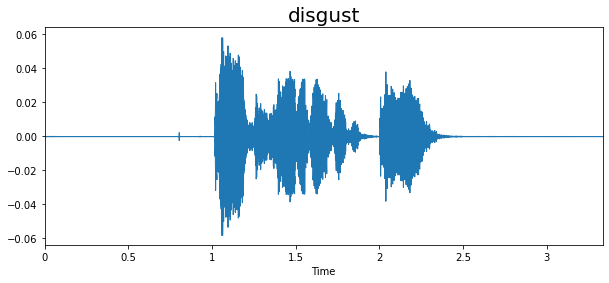

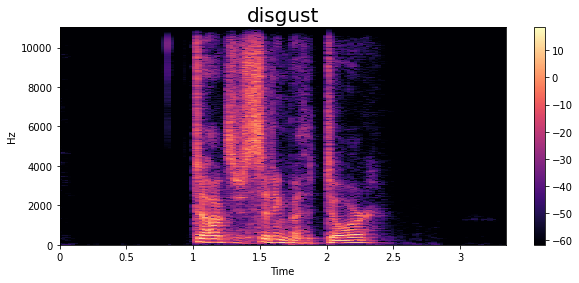

In [ ]:
play_audio(disgust_path,'disgust')
audio_plots(disgust_path,'disgust')

Audio Sample of: angry


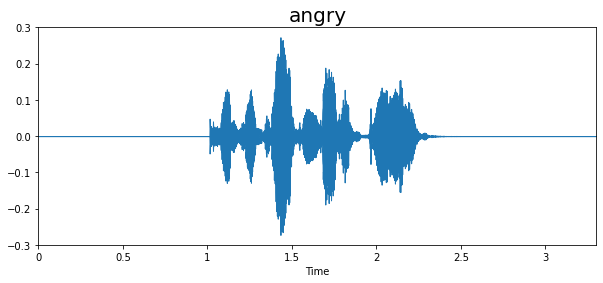

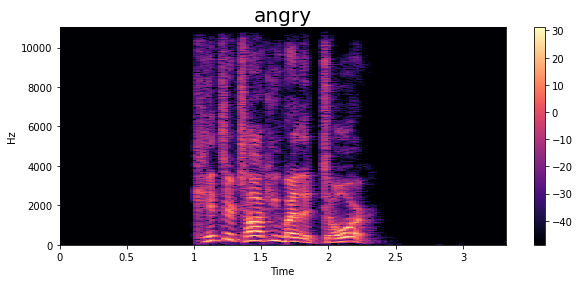

In [ ]:
play_audio(angry_path,'angry')
audio_plots(angry_path,'angry')

Audio Sample of: neutral


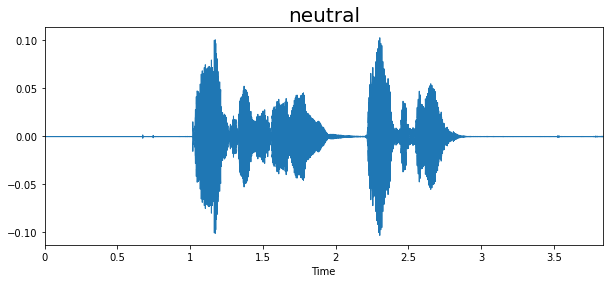

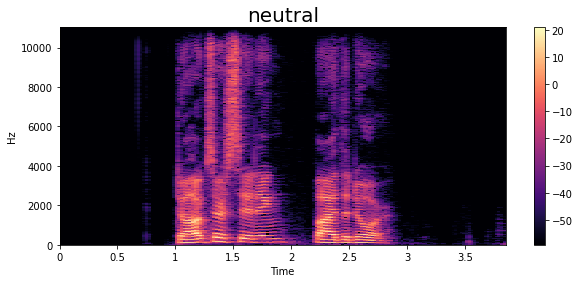

In [ ]:
play_audio(neutral_path,'neutral')
audio_plots(neutral_path,'neutral')